# Análise Exploratória — E-Commerce Brasileiro (Olist)




##Contexto
A Olist é uma plataforma brasileira que conecta pequenos lojistas a grandes marketplaces. Este dataset contém informações reais de pedidos realizados entre 2016 e 2018.

## Objetivo
Explorar os dados para entender o comportamento de vendas, satisfação dos clientes e performance de entrega por região do Brasil.

## Perguntas que vamos responder
- Quais estados concentram mais pedidos?
- Quais categorias de produtos são mais vendidas?
- Como os clientes avaliam suas compras?
- Qual o tempo médio de entrega por região?
- Existe sazonalidade nas vendas?

Importar Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando visuais
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12

Carregar os dados

In [3]:
# Upload dos arquivos

orders       = pd.read_csv("olist_orders_dataset.csv")
customers    = pd.read_csv("olist_customers_dataset.csv")
order_items  = pd.read_csv("olist_order_items_dataset.csv")
products     = pd.read_csv("olist_products_dataset.csv")
reviews      = pd.read_csv("olist_order_reviews_dataset.csv")
category_translation = pd.read_csv("product_category_name_translation.csv")

print("Dados carregados com sucesso!")
print(f"Pedidos: {orders.shape[0]:,} linhas")
print(f"Clientes: {customers.shape[0]:,} linhas")

Dados carregados com sucesso!
Pedidos: 99,441 linhas
Clientes: 99,441 linhas


Inspeção inicial

In [4]:
# Visão geral dos pedidos
print("=== Pedidos ===")
print(orders.info())
print("\nNulos por coluna:")
print(orders.isnull().sum())

=== Pedidos ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Nulos por coluna:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date    

Limpeza dos dados

In [5]:
# Converter datas para o tipo correto
date_cols = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col])


In [6]:
# Filtrar apenas pedidos entregues
orders_delivered = orders[orders["order_status"] == "delivered"].copy()

In [7]:
# Calcular tempo de entrega em dias
orders_delivered["delivery_days"] = (
    orders_delivered["order_delivered_customer_date"] -
    orders_delivered["order_purchase_timestamp"]
).dt.days

print(f"Pedidos entregues: {len(orders_delivered):,}")
print(f"Tempo médio de entrega: {orders_delivered['delivery_days'].mean():.1f} dias")

Pedidos entregues: 96,478
Tempo médio de entrega: 12.1 dias


Análise por estado

/tmp/ipython-input-62240162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pedidos_por_estado, x="Estado", y="Pedidos", palette="Blues_d", ax=ax)


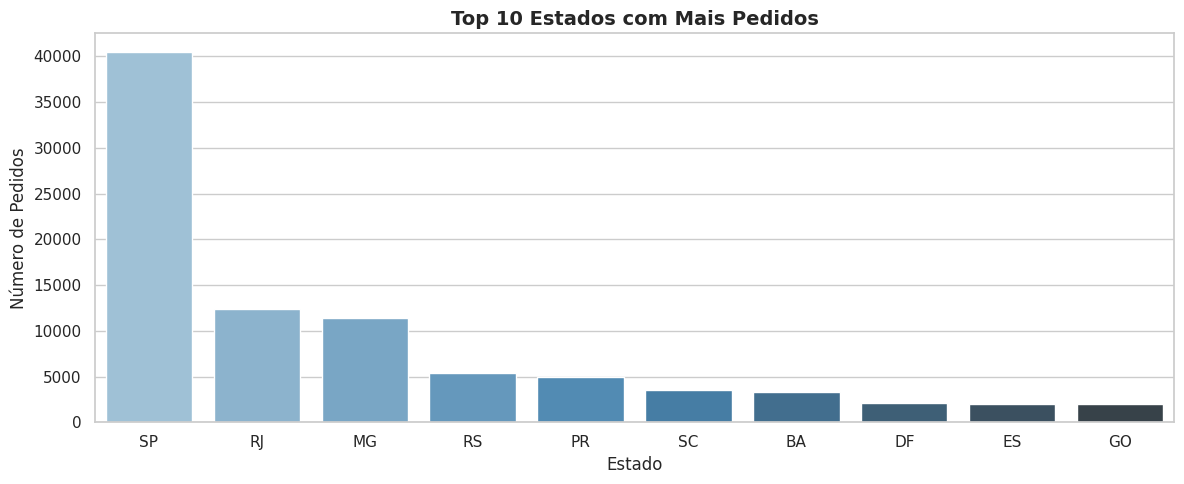

In [8]:
# Juntar pedidos com clientes
df = orders_delivered.merge(customers, on="customer_id")

# Contagem por estado
pedidos_por_estado = (
    df.groupby("customer_state")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
pedidos_por_estado.columns = ["Estado", "Pedidos"]

# Gráfico
fig, ax = plt.subplots()
sns.barplot(data=pedidos_por_estado, x="Estado", y="Pedidos", palette="Blues_d", ax=ax)
ax.set_title("Top 10 Estados com Mais Pedidos", fontsize=14, fontweight="bold")
ax.set_xlabel("Estado")
ax.set_ylabel("Número de Pedidos")
plt.tight_layout()
plt.show()

Categorias mais vendidas

/tmp/ipython-input-2691838343.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categorias, x="Vendas", y="Categoria", palette="Greens_d", ax=ax)


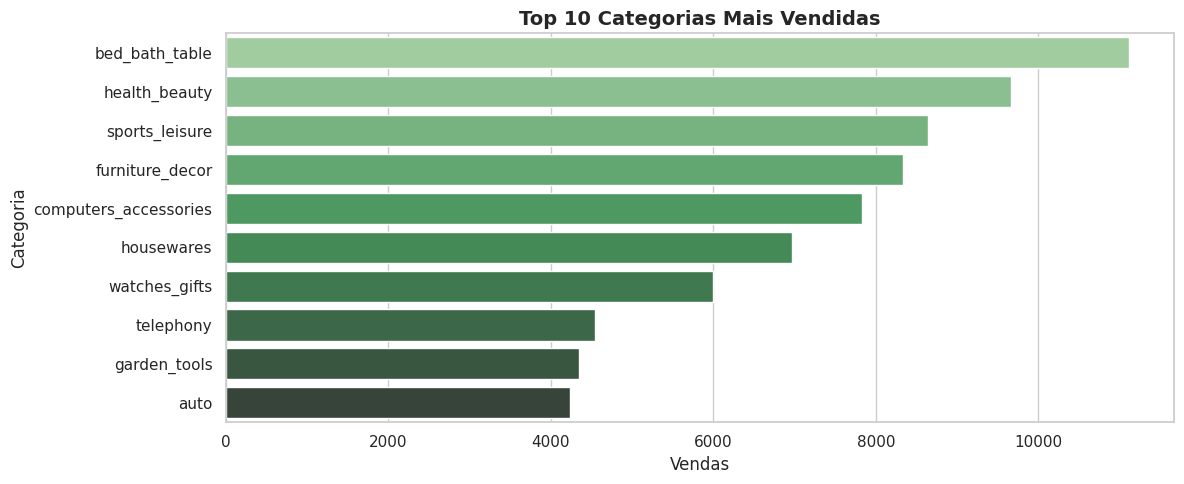

In [9]:
# Juntar produtos com tradução e itens
produtos = products.merge(category_translation, on="product_category_name", how="left")
itens = order_items.merge(produtos, on="product_id")

top_categorias = (
    itens.groupby("product_category_name_english")["order_id"]
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
top_categorias.columns = ["Categoria", "Vendas"]

fig, ax = plt.subplots()
sns.barplot(data=top_categorias, x="Vendas", y="Categoria", palette="Greens_d", ax=ax)
ax.set_title("Top 10 Categorias Mais Vendidas", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

Avaliações dos clientes

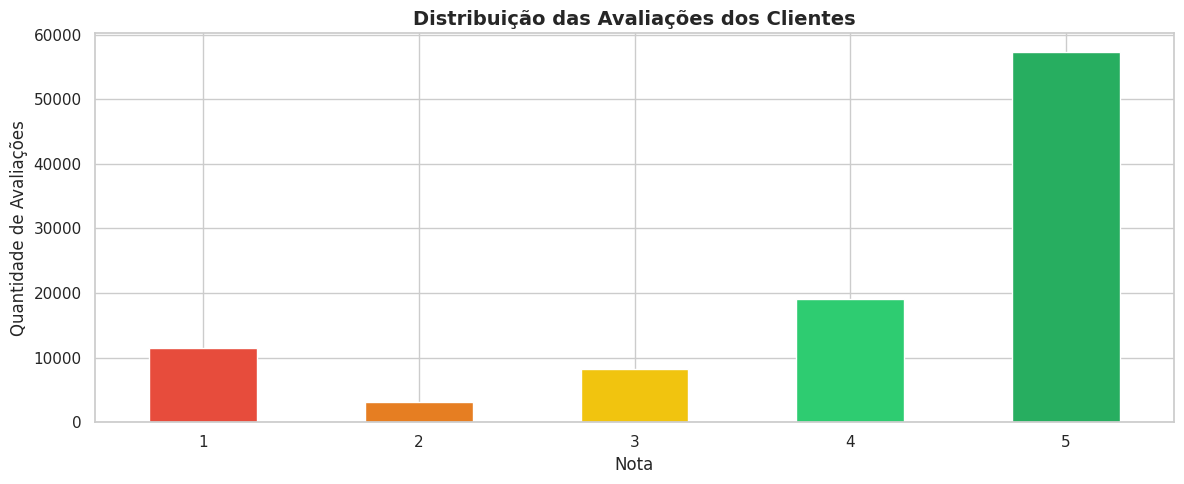

Nota média geral: 4.09 / 5.0


In [10]:
contagem_notas = reviews["review_score"].value_counts().sort_index()

fig, ax = plt.subplots()
cores = ["#e74c3c", "#e67e22", "#f1c40f", "#2ecc71", "#27ae60"]
contagem_notas.plot(kind="bar", color=cores, ax=ax, edgecolor="white")
ax.set_title("Distribuição das Avaliações dos Clientes", fontsize=14, fontweight="bold")
ax.set_xlabel("Nota")
ax.set_ylabel("Quantidade de Avaliações")
ax.set_xticklabels(["1", "2", "3", "4", "5"], rotation=0)
plt.tight_layout()
plt.show()

media = reviews["review_score"].mean()
print(f"Nota média geral: {media:.2f} / 5.0")


Sazonalidade das vendas

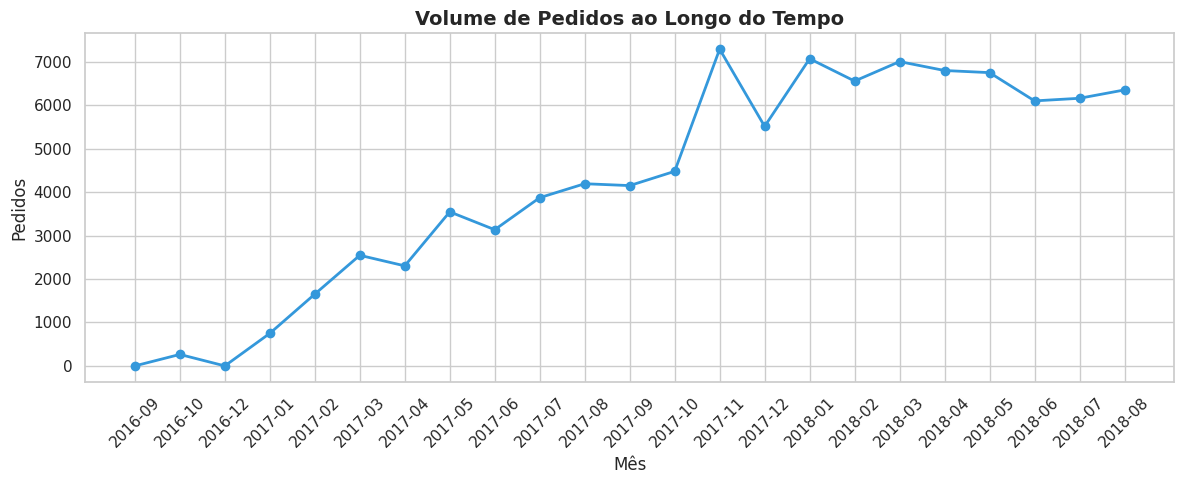

In [11]:
orders_delivered["mes"] = orders_delivered["order_purchase_timestamp"].dt.to_period("M")

vendas_mensais = (
    orders_delivered.groupby("mes")["order_id"]
    .count()
    .reset_index()
)
vendas_mensais.columns = ["Mês", "Pedidos"]
vendas_mensais["Mês"] = vendas_mensais["Mês"].astype(str)

fig, ax = plt.subplots()
ax.plot(vendas_mensais["Mês"], vendas_mensais["Pedidos"], marker="o", color="#3498db", linewidth=2)
ax.set_title("Volume de Pedidos ao Longo do Tempo", fontsize=14, fontweight="bold")
ax.set_xlabel("Mês")
ax.set_ylabel("Pedidos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusão

- **SP, RJ e MG** concentram a maior parte dos pedidos, refletindo a concentração populacional.
- As categorias **bed_bath_table, health_beauty e sports_leisure** lideram as vendas.
- A maioria dos clientes avalia bem suas compras — mais de 50% deram nota **5**.
- O tempo médio de entrega é de aproximadamente **12 dias**, com variação regional significativa.
- Há um crescimento claro de pedidos ao longo de 2017, com pico no segundo semestre.
